# Decision tree classifier: diabetes prediction

Absolutely minimal MVP (minimum viable product) solution.

## 1. Data acquisition

### 1.1. Load

In [25]:
import pandas as pd

# Load the data from the URL
data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
data_df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [28]:
data_df.shape

(768, 9)

### 1.2. Train-test split

In [45]:
# Separate features from labels
labels=data_df['Outcome']
features=data_df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=315
)

## 2. EDA

### 2.1. Features

In [30]:
# Inspect the training features' data types
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 765 to 611
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 43.2 KB


In [31]:
training_features.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.851792,121.396721,72.311337,21.307818,83.459283,32.215961,0.473090,33.245928
std,3.403173,29.927700,11.969831,16.055309,120.021358,7.706636,0.339908,11.742608
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.239250,24.000000
50%,3.000000,118.000000,72.000000,24.000000,39.000000,32.350000,0.370500,29.000000
75%,6.000000,138.000000,80.000000,33.000000,130.000000,36.575000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000


All of the features are already numeric - we don't need to do anything for the model to run. Let's check the labels too.

### 2.2. Labels

In [32]:
training_labels.info()

<class 'pandas.core.series.Series'>
Index: 614 entries, 765 to 611
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


In [33]:
mean_glucose = training_features['Glucose'].mean()
mean_blood_pressure = training_features['BloodPressure'].mean()
print(training_features[['Glucose', 'BloodPressure']].head())

     Glucose  BloodPressure
765    121.0           72.0
74      79.0           75.0
733    106.0           56.0
740    120.0           80.0
0      148.0           72.0


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Replace 0s with NaN in the columns 'Glucose' and 'BloodPressure'
training_features[['Glucose', 'BloodPressure']] = training_features[['Glucose', 'BloodPressure']].replace(0, pd.NA)
testing_features[['Glucose', 'BloodPressure']] = testing_features[['Glucose', 'BloodPressure']].replace(0, pd.NA)

# Impute missing values in the training set
training_features['Glucose'] = training_features['Glucose'].fillna(training_features['Glucose'].mean())
training_features['BloodPressure'] = training_features['BloodPressure'].fillna(training_features['BloodPressure'].mean())

# Use the training set mean to fill missing values in the testing set
testing_features['Glucose'] = testing_features['Glucose'].fillna(training_features['Glucose'].mean())
testing_features['BloodPressure'] = testing_features['BloodPressure'].fillna(training_features['BloodPressure'].mean())

# Check the imputed data
print("Training features:\n", training_features[['Glucose', 'BloodPressure']].head())
print("Testing features:\n", testing_features[['Glucose', 'BloodPressure']].head())



Training features:
      Glucose  BloodPressure
765    121.0           72.0
74      79.0           75.0
733    106.0           56.0
740    120.0           80.0
0      148.0           72.0
Testing features:
      Glucose  BloodPressure
238    164.0           84.0
27      97.0           66.0
90      80.0           55.0
447     95.0           80.0
107    144.0           58.0


In [35]:
print("Training Set:")
print(training_features[['Glucose', 'BloodPressure']].head())

print("\nTesting Set:")
print(testing_features[['Glucose', 'BloodPressure']].head())

Training Set:
     Glucose  BloodPressure
765    121.0           72.0
74      79.0           75.0
733    106.0           56.0
740    120.0           80.0
0      148.0           72.0

Testing Set:
     Glucose  BloodPressure
238    164.0           84.0
27      97.0           66.0
90      80.0           55.0
447     95.0           80.0
107    144.0           58.0


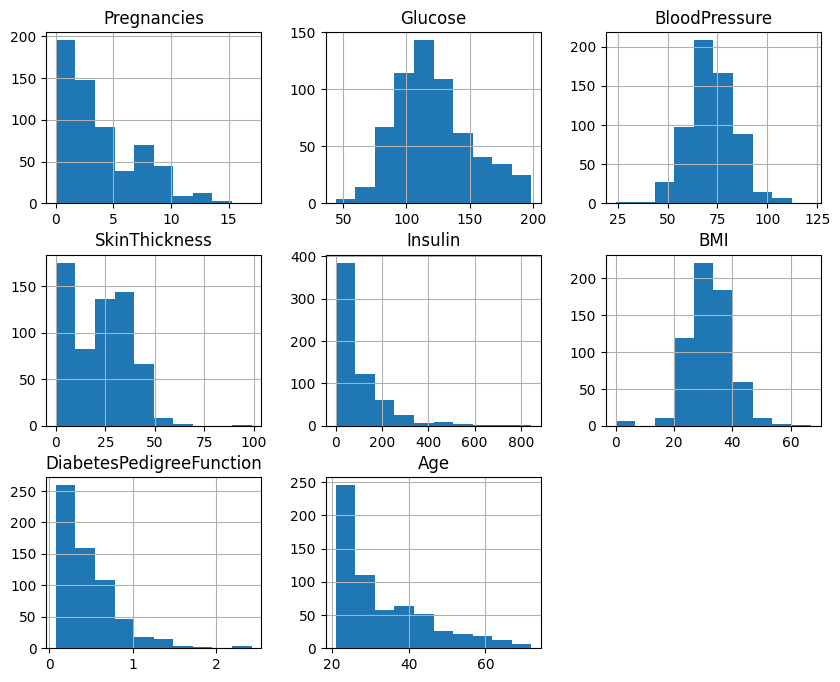

In [36]:
import matplotlib as plt

_=training_features.hist(figsize=(10, 8))



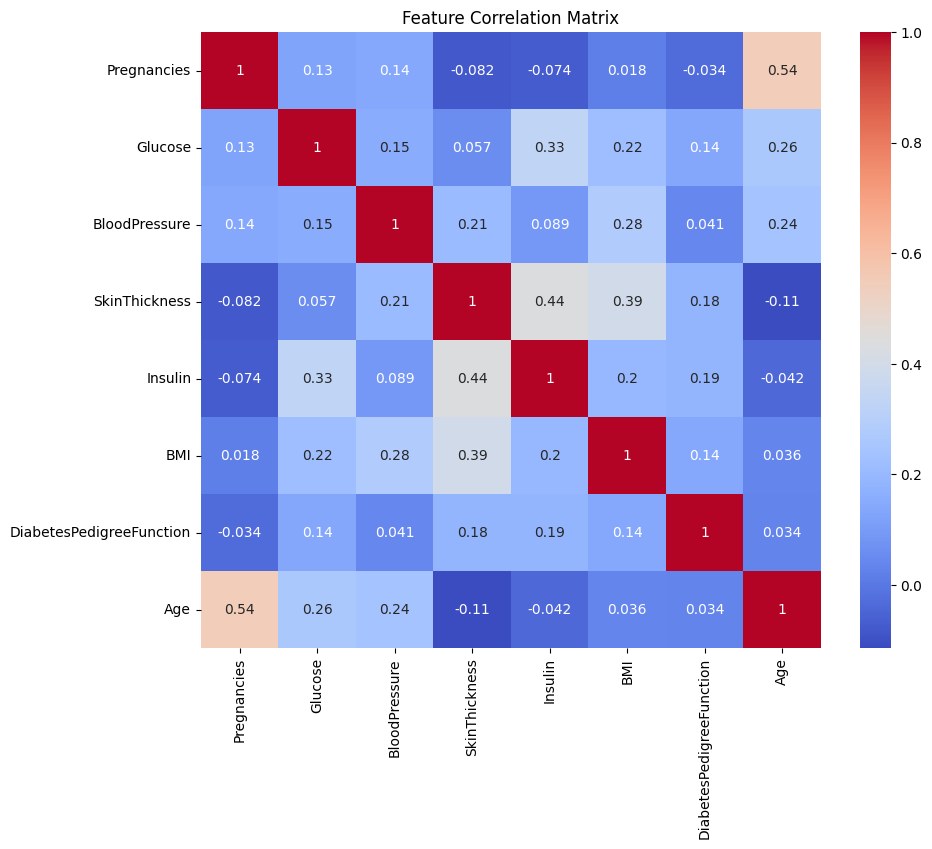

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

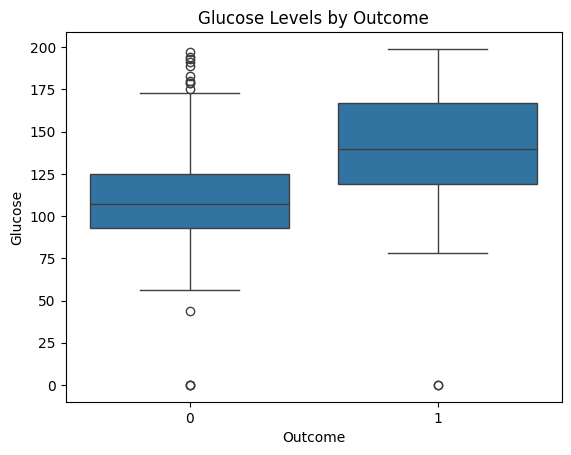

In [38]:
sns.boxplot(x=labels, y=features['Glucose'])
plt.title("Glucose Levels by Outcome")
plt.show()

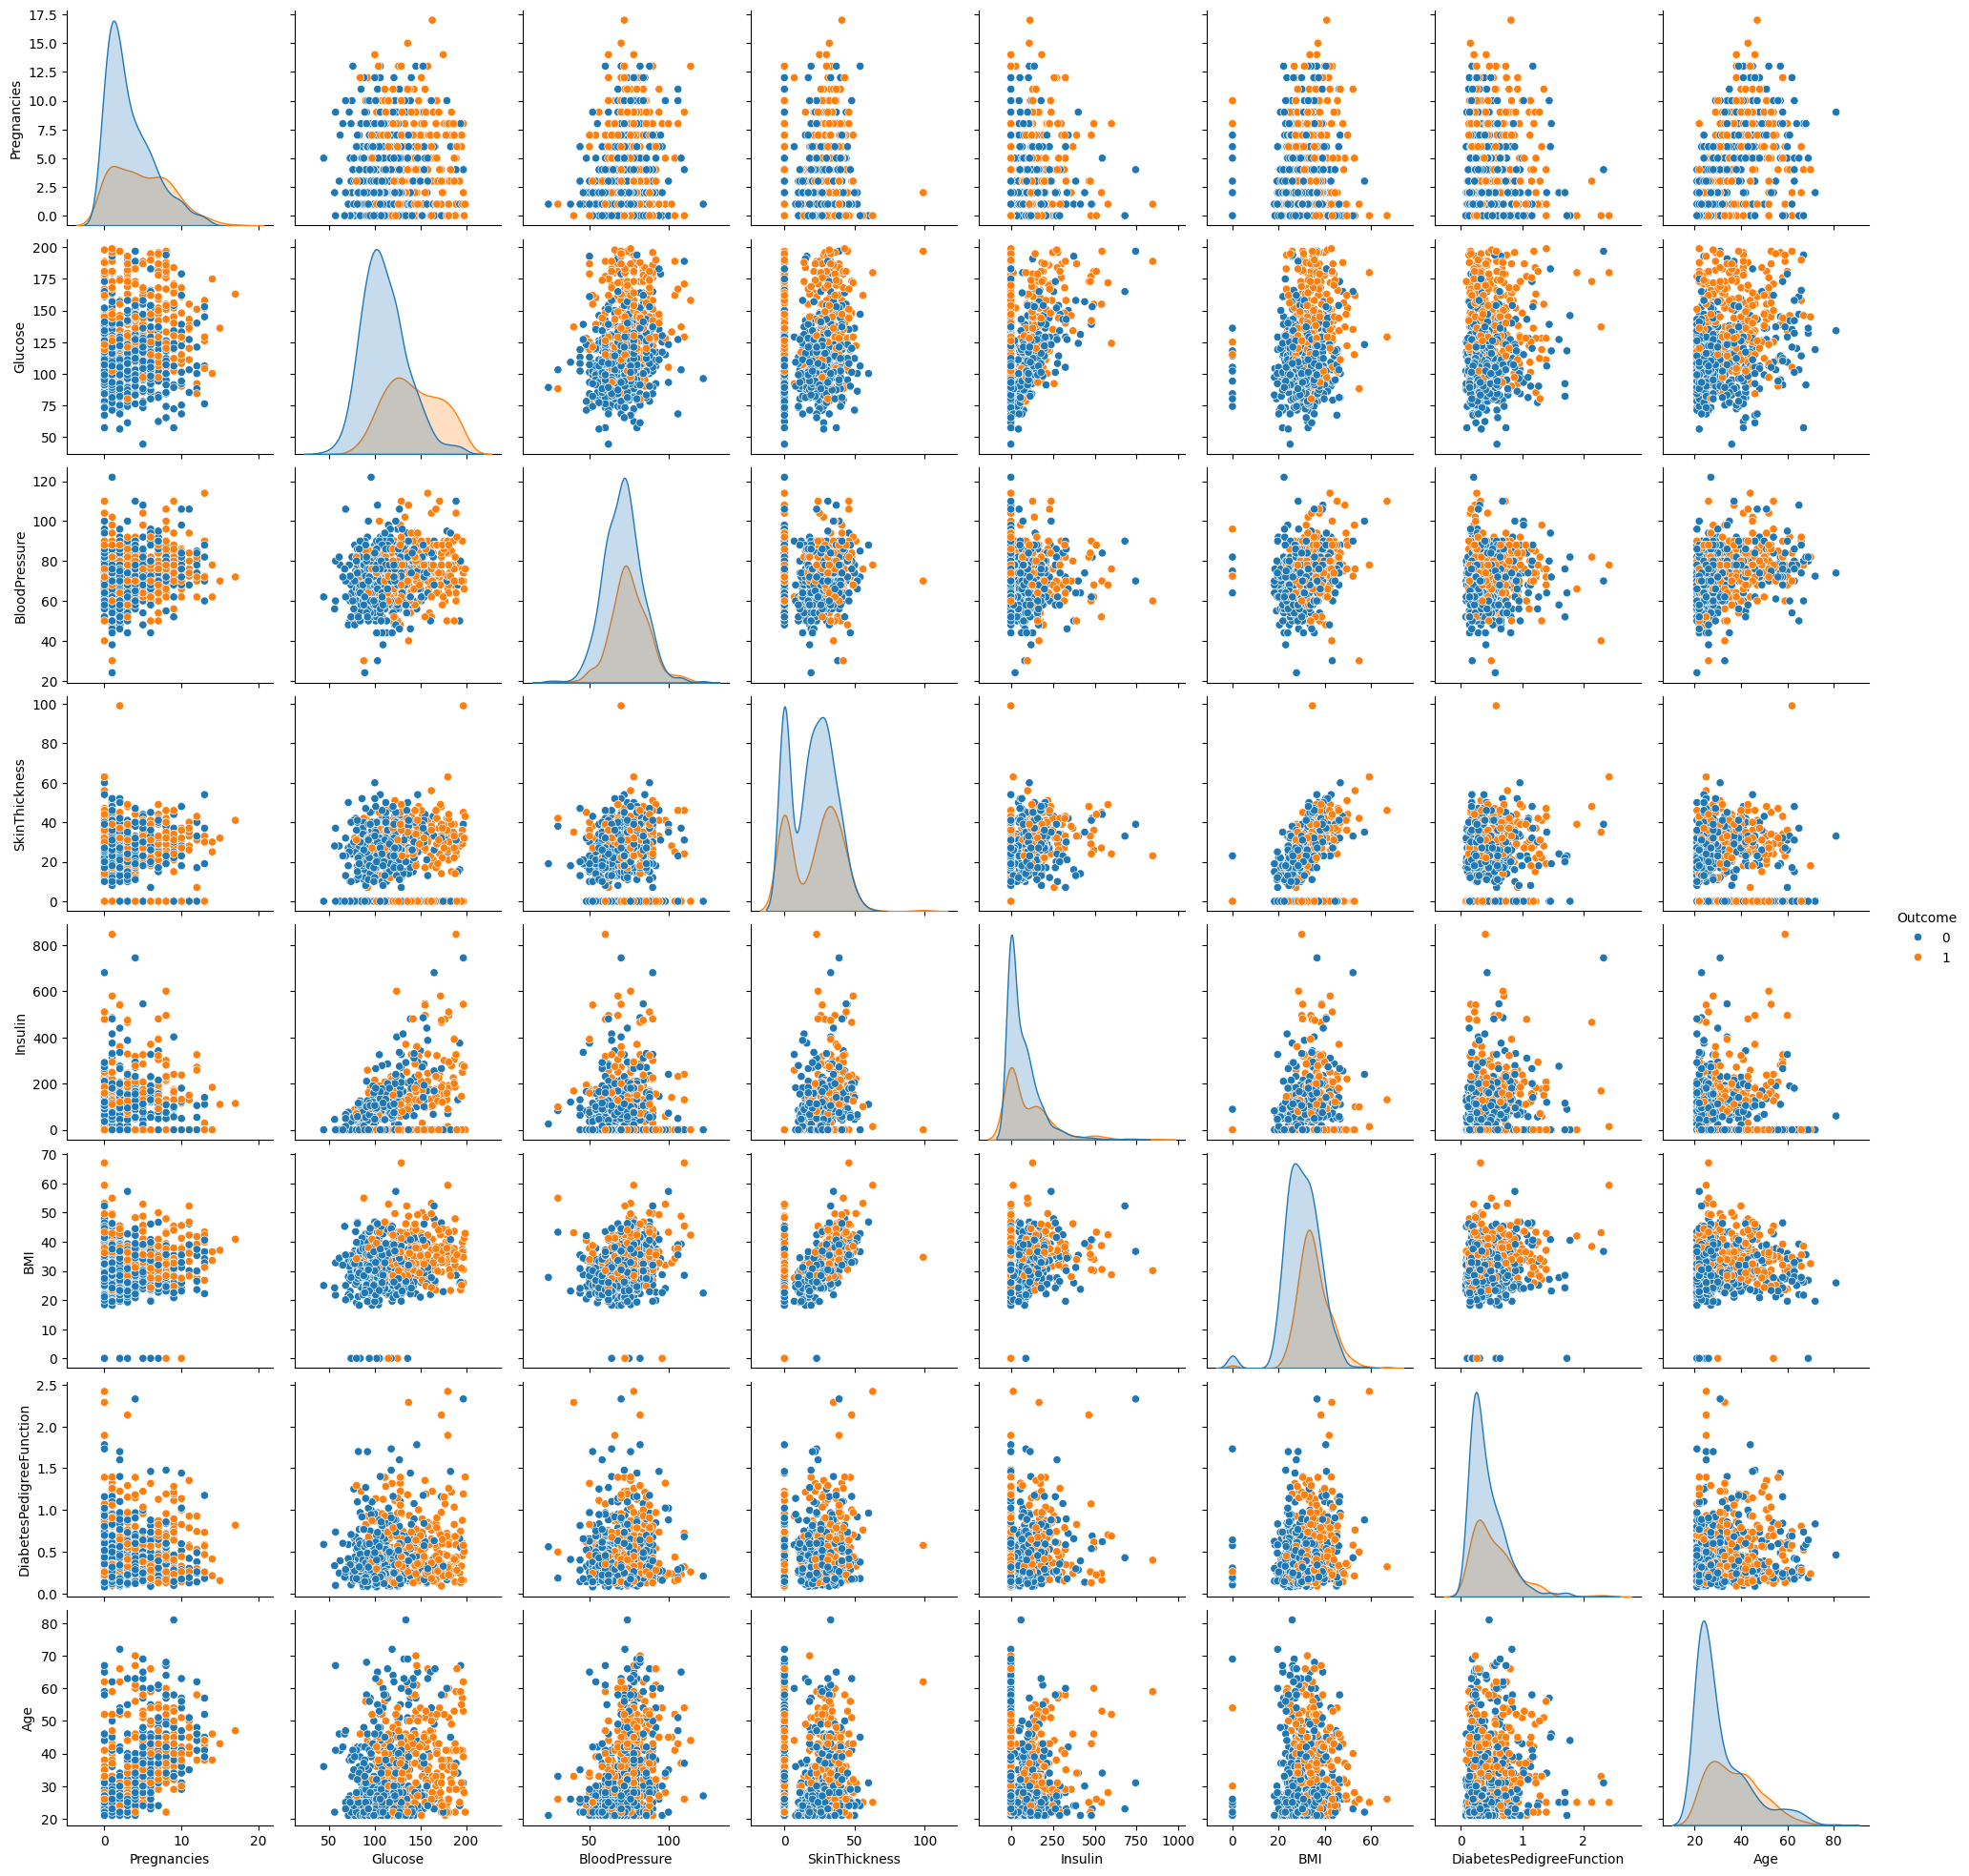

In [39]:
sns.pairplot(data_df, hue='Outcome')
plt.show()

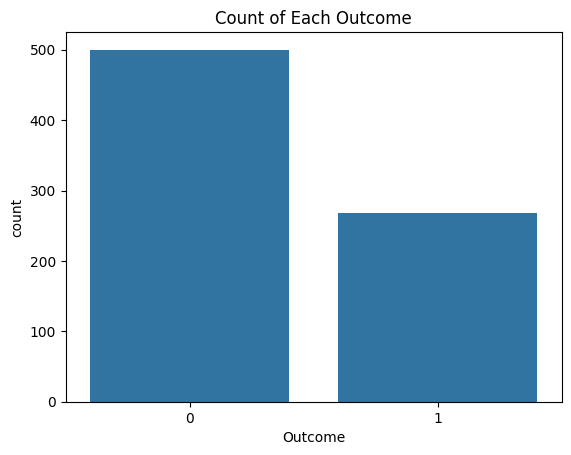

In [40]:
sns.countplot(x='Outcome', data=data_df)
plt.title("Count of Each Outcome")
plt.show()

In [51]:
# Define a reusable helper function for cross-validation here. We are going to
# be doing a lot of cross-validation, this allows us to reuse this code
# without having to copy-paste it over and over.

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

def cross_val(model, features: pd.DataFrame, labels: pd.Series) -> list[float]:
    '''Reusable helper function to run cross-validation on a model. Takes model,
    Pandas data frame of features and Pandas data series of labels. Returns 
    list of cross-validation fold accuracy scores as percents.'''

    # Define the cross-validation strategy
    cross_validation=StratifiedKFold(n_splits=7, shuffle=True, random_state=315)

    # Run the cross-validation, collecting the scores
    scores=cross_val_score(
        model,
        features,
        labels,
        cv=cross_validation,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Print mean and standard deviation of the scores
    print(f'Cross-validation accuracy: {(scores.mean() * 100):.2f} +/- {(scores.std() * 100):.2f}%')

    # Return the scores
    return scores

In [52]:
# Instantiate a random forest classifier model
model=DecisionTreeClassifier(random_state=315)

# Run the cross-validation
scores=cross_val(model, training_features, training_labels)

Cross-validation accuracy: 70.70 +/- 9.25%


Also already numeric - we can move right to training the model and setting a baseline performance result.

## 3. Training

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train decision tree classifier
model=DecisionTreeClassifier(random_state=315)
fit_result=model.fit(training_features, training_labels)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}
# Instantiate GridSearchCV with the corrected parameter grid
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=315), param_grid, cv=5, n_jobs=-1)
grid_search.fit(training_features, training_labels)
# Output best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Use the best model found by GridSearchCV
best_tree_model = grid_search.best_estimator_
# Make predictions with the optimized model
best_tree_predictions = best_tree_model.predict(testing_features)
# Evaluate the optimized model
best_tree_accuracy = accuracy_score(testing_labels, best_tree_predictions)
print(f'Optimized Decision Tree Model Accuracy: {best_tree_accuracy:.2f}')



Best Hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Optimized Decision Tree Model Accuracy: 0.75


## 4. Evaluation

In [55]:
from sklearn.metrics import accuracy_score

# Make predictions from test set features
predicted_labels=model.predict(testing_features)

# Score predictions from accuracy
percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 73.4% accurate on the test data


Ok, done! Absolutely minimal decision tree classifier using ~10 statements. From here, there is **a lot** we can and should do to improve. But now we can do so incrementally, while maintaining a running state. We can also tell if anything we do 'works' in the performance sense by comparing to our baseline result of ~75% accuracy.